In [21]:
from sklearn.cluster import HDBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import (silhouette_score, davies_bouldin_score, calinski_harabasz_score,)

In [2]:
data=pd.read_csv('data.csv')

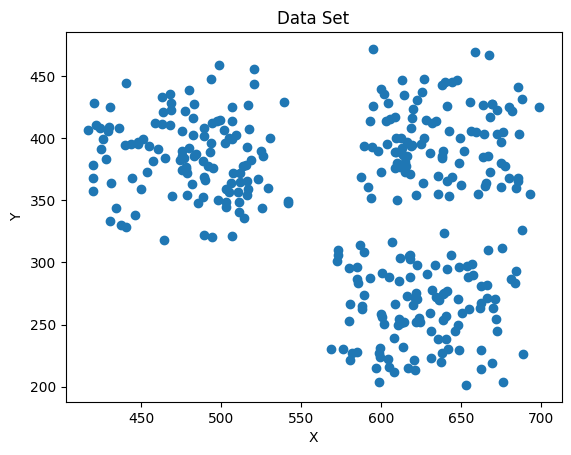

In [3]:
#plot the dataset
plt.scatter(data['X'],data['Y'])
plt.title('Data Set')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

##### HDBSCAN

In [4]:
def evaluate_HDBSCAN(data, cluster_list: list)->tuple:
    silhouette,davies_bouldin,calinski_harabasz = [],[],[]
    for cluster_size in cluster_list:
        
        HDBS_model = HDBSCAN(min_cluster_size=cluster_size,metric='euclidean',min_samples=2)
        cluster_labels = HDBS_model.fit(data).labels_
        silhouette.append(round(silhouette_score(data, cluster_labels),4))
        davies_bouldin.append(round(davies_bouldin_score(data, cluster_labels),4))
        calinski_harabasz.append(round(calinski_harabasz_score(data, cluster_labels),4))
    return (silhouette,davies_bouldin,calinski_harabasz)


In [5]:
n_clusters = range(5,20)
results = evaluate_HDBSCAN(data, n_clusters)

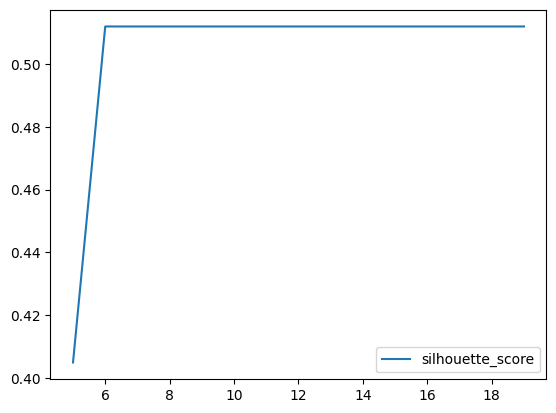

In [6]:
"""The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. 
It ranges from -1 to 1, where higher values indicate better clustering."""

plt.plot(n_clusters,results[0],label='silhouette_score')
plt.legend()
plt.show()

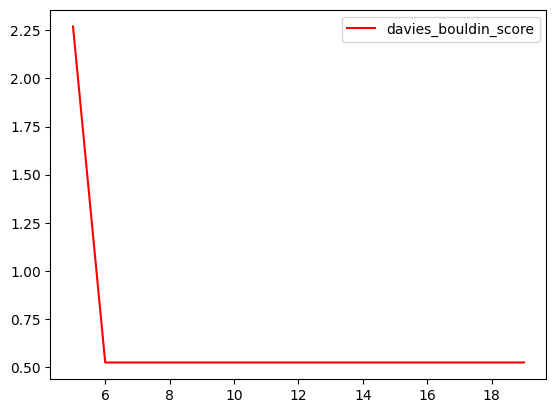

In [7]:
"""The Davies-Bouldin Index is the average similarity ratio of each cluster with 
its most similar cluster, where lower values indicate better clustering."""

plt.plot(n_clusters,results[1],label='davies_bouldin_score',color='red')
plt.legend()
plt.show()


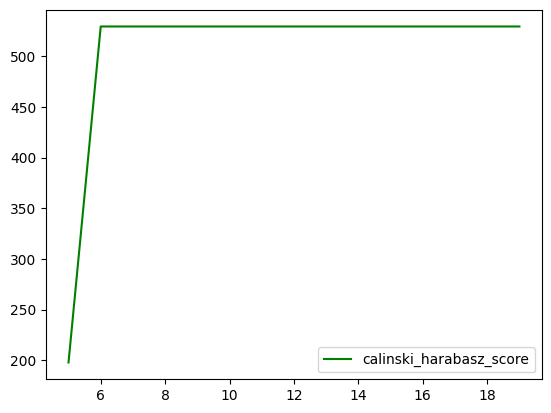

In [8]:
"""The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, is the ratio of 
the sum of between-cluster dispersion and within-cluster dispersion. Higher values indicate better clustering."""

plt.plot(n_clusters,results[2],label='calinski_harabasz_score',color='green')
plt.legend()
plt.show()

In [19]:
# based on the results the optimal number of min cluster size is  20
cluster = HDBSCAN(min_cluster_size=20,metric='euclidean',min_samples=3,algorithm="balltree")
cluster_labels = cluster.fit_predict(data)
print("the best silhouette_score =", round(silhouette_score(data, cluster_labels),4))
print("the best davies_bouldin_score =", round(davies_bouldin_score(data, cluster_labels),4))
print("the best calinski_harabasz_score =", round(calinski_harabasz_score(data, cluster_labels),4))

the best silhouette_score = 0.5119
the best davies_bouldin_score = 0.5233
the best calinski_harabasz_score = 529.5766


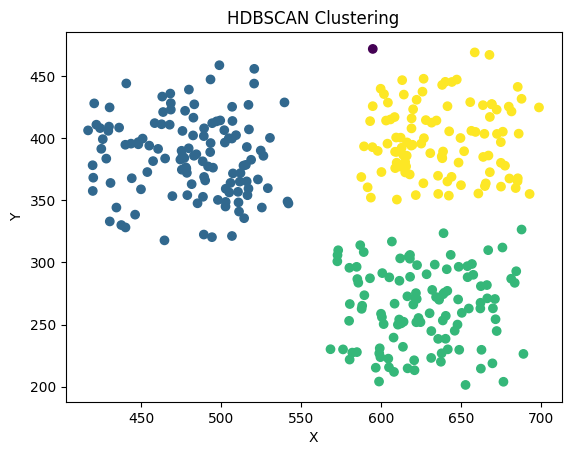

In [20]:
# plot the cluster 

plt.scatter(data['X'],data['Y'],c=cluster_labels)
plt.title('HDBSCAN Clustering')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()